In [2]:
# CHANGE LOOPING INDICES AND FILE NAMES CORRESPONDINGLY.
import numpy as np
import struct
import matplotlib.pyplot as plt
import time
from scipy.optimize import curve_fit

In [2]:
# CHANGE LOOPING INDICES AND FILE NAMES CORRESPONDINGLY.

for j in range(0,70):
    ## Unpack binary file and sort out t and c arrays
    # channel array corresponds to 1,2,3,4 channel
    # time array: time at which a count is observed 
    file = '/home/zhi/SULI21/data_analysis/071621/Motorized_10sStep_70min_' + str(j) + '.bin'
    with open(file, 'rb') as f:
        data = f.read()
    t=[]
    c=[]
    for i in range(int(len(data[40:])/10)):   
        t.append(struct.unpack('q', data[40+ 10*i:48 + 10*i])[0])
        c.append(struct.unpack('h', data[48+ 10*i:50 + 10*i])[0])
    t = np.asarray(t)
    c = np.asarray(c)
    

    ## Separate by channel and remove APs
    t1 = t[np.where(c==1)]
    t2 = t[np.where(c==2)]
    t3 = t[np.where(c==3)]
    t4 = t[np.where(c==4)]
    c1 = c[np.where(c==1)]
    c2 = c[np.where(c==2)]
    c3 = c[np.where(c==3)]
    c4 = c[np.where(c==4)]
    
    #remove AP
    t1_new = np.delete(t1, np.asarray(np.where(t1[1:]-t1[:-1]<=30e3))+1)
    t2_new = np.delete(t2, np.asarray(np.where(t2[1:]-t2[:-1]<=30e3))+1)
    t3_new = np.delete(t3, np.asarray(np.where(t3[1:]-t3[:-1]<=30e3))+1)
    t4_new = np.delete(t4, np.asarray(np.where(t4[1:]-t4[:-1]<=30e3))+1)
    c1_new = np.delete(c1, np.asarray(np.where(t1[1:]-t1[:-1]<=30e3))+1)
    c2_new = np.delete(c2, np.asarray(np.where(t2[1:]-t2[:-1]<=30e3))+1)
    c3_new = np.delete(c3, np.asarray(np.where(t3[1:]-t3[:-1]<=30e3))+1)
    c4_new = np.delete(c4, np.asarray(np.where(t4[1:]-t4[:-1]<=30e3))+1)
    
    
    t_hold = np.concatenate((t1_new,t2_new,t3_new,t4_new), axis = None) #1D, 
    c_hold = np.concatenate((c1_new,c2_new,c3_new,c4_new), axis = None) 
    
    t = t_hold[np.argsort(t_hold, axis = None)] # sort t smallest to largest, 
    c = c_hold[np.argsort(t_hold, axis = None)] # and sort c so it corresponds to t array

    ## Save raw data arrays
    np.save('/home/zhi/SULI21/data_analysis/analyzed_data/Mo_t_70min_'+ str(j), t)
    np.save('/home/zhi/SULI21/data_analysis/analyzed_data/Mo_c_70min_'+ str(j), c)
    
    ## Save no AP arrays
    #np.save('/home/zhi/SULI21/data_analysis/analyzed_data/t_noAP_' + np.str(j), t_noAP)
    #np.save('/home/zhi/SULI21/data_analysis/analyzed_data/c_noAP_' + np.str(j), c_noAP)

In [12]:
t = np.load('/home/zhi/SULI21/data_analysis/analyzed_data/RL_t_60min_0.npy')
c = np.load('/home/zhi/SULI21/data_analysis/analyzed_data/RL_c_60min_0.npy')

In [3]:
def Analysis(file_number):
    """ Provide file number and returns complete coincidence analysis"""
    
    t = np.load('/home/zhi/SULI21/data_analysis/analyzed_data/RL_t_60min_'+ np.str(file_number) +'.npy')
    c = np.load('/home/zhi/SULI21/data_analysis/analyzed_data/RL_c_60min_'+ np.str(file_number) +'.npy')
    
    N = t.size
    dt12=[]
    j=1
    length = 1
    
    # concatenate channel 1 minus 2, so 1 is after
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==1, c[:-j]==2)))[0])
        dt12 = np.concatenate((dt12,(t[indices+j] - t[indices])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==2, c[:-j]==1)))[0])
        dt12 = np.concatenate((dt12,(t[indices] - t[indices+j])), axis = None)
        length = len(indices)
        j+=1
        
        
        
    dt13=[]
    j=1
    length = 1
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==1, c[:-j]==3)))[0])
        dt13 = np.concatenate((dt13,(t[indices+j] - t[indices])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==3, c[:-j]==1)))[0])
        dt13 = np.concatenate((dt13,(t[indices] - t[indices+j])), axis = None)
        length = len(indices)
        j+=1
        
    
    dt14=[]
    j=1
    length = 1
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==1, c[:-j]==4)))[0])
        dt14 = np.concatenate((dt14,(t[indices+j] - t[indices])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==4, c[:-j]==1)))[0])
        dt14 = np.concatenate((dt14,(t[indices] - t[indices+j])), axis = None)
        length = len(indices)
        j+=1
        
        
        
    dt23=[]
    j=1
    length = 1
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==2, c[:-j]==3)))[0])
        dt23 = np.concatenate((dt23,(t[indices+j] - t[indices])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==3, c[:-j]==2)))[0])
        dt23 = np.concatenate((dt23,(t[indices] - t[indices+j])), axis = None)
        length = len(indices)
        j+=1

        
        
    dt24=[]
    j=1
    length = 1
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==2, c[:-j]==4)))[0])
        dt24 = np.concatenate((dt24,(t[indices+j] - t[indices])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==4, c[:-j]==2)))[0])
        dt24 = np.concatenate((dt24,(t[indices] - t[indices+j])), axis = None)
        length = len(indices)
        j+=1
        
        
    
    dt34=[]
    j=1
    length = 1
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==3, c[:-j]==4)))[0])
        dt34 = np.concatenate((dt34,(t[indices+j] - t[indices])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=20e3, np.logical_and(c[j:]==4, c[:-j]==3)))[0])
        dt34 = np.concatenate((dt34,(t[indices] - t[indices+j])), axis = None)
        length = len(indices)
        j+=1
        
    return (dt12, dt13, dt14, dt23, dt24, dt34)


In [4]:
nbins = 600    # 600 bins

h12_total = np.zeros(nbins);
h13_total = np.zeros(nbins);
h14_total = np.zeros(nbins);
h23_total = np.zeros(nbins);
h24_total = np.zeros(nbins);
h34_total = np.zeros(nbins);


# do sample for 0~1 bin
for j in range(0,10):
    print(j)
    dt12 = []
    dt13 = []
    dt14 = []
    dt23 = []
    dt24 = []
    dt34 = []
    for i in range(6):
        master = Analysis((6*j+i))    # adds N bins at a time.
        dt12 = np.concatenate((dt12, master[0]), axis = None)
        dt13 = np.concatenate((dt13, master[1]), axis = None)    # add 0~3 bins together
        dt14 = np.concatenate((dt14, master[2]), axis = None)
        dt23 = np.concatenate((dt23, master[3]), axis = None)
        dt24 = np.concatenate((dt24, master[4]), axis = None)
        dt34 = np.concatenate((dt34, master[5]), axis = None)
    
    h12 = np.histogram(dt12, bins = nbins)[0];
    h13 = np.histogram(dt13, bins = nbins)[0];    #put into bins, outputs number of counts for some dt 
    h14 = np.histogram(dt14, bins = nbins)[0];
    h23 = np.histogram(dt23, bins = nbins)[0];
    h24 = np.histogram(dt24, bins = nbins)[0];
    h34 = np.histogram(dt34, bins = nbins)[0];
    
    '''
    globals()['h12_'+np.str(3*j+1)+'_'+np.str(3*j+3)] = h12    
    globals()['h13_'+np.str(3*j+1)+'_'+np.str(3*j+3)] = h13   #records global variable of bins 3j~3j+1 
    globals()['h14_'+np.str(3*j+1)+'_'+np.str(3*j+3)] = h14
    globals()['h23_'+np.str(3*j+1)+'_'+np.str(3*j+3)] = h23
    globals()['h24_'+np.str(3*j+1)+'_'+np.str(3*j+3)] = h24
    globals()['h34_'+np.str(3*j+1)+'_'+np.str(3*j+3)] = h34
    '''
    
    h12_total += h12
    h13_total += h13
    h14_total += h14    # sum up all counts in all bins
    h23_total += h23
    h24_total += h24
    h34_total += h34

0
1
2
3
4
5
6
7
8
9


In [ ]:
x = np.linspace(-20,20,nbins+1)

In [9]:
def gauss(t, A, t0, sigma, D):
    return (A/(sigma*np.sqrt(2*np.pi)))*np.exp(-((t-t0)**2)/(2*sigma**2)) + D

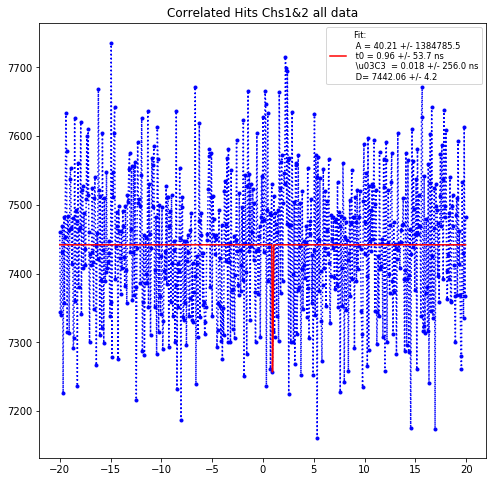

In [10]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Correlated Hits Chs1&2 all data')
#|plt.xlim([0,2])
best_vals, covar = curve_fit(gauss, x[:-1], h12_total, p0 = [200, 1, .1, 1650])
ax.plot(x[:-1], h12_total, 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
ax.legend(fontsize = 'small')
globals()["t0_12"] = ((best_vals[1]))
globals()["sigma_12"] = abs((best_vals[2]))

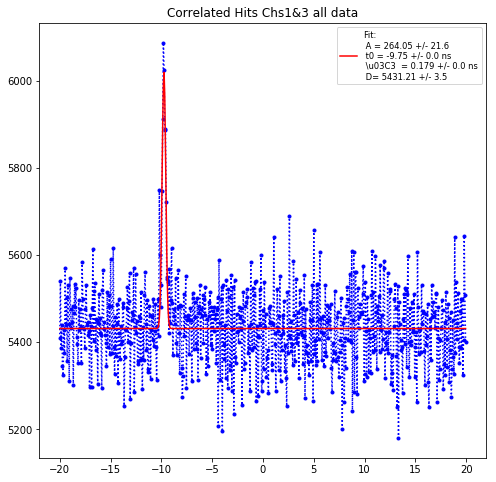

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Correlated Hits Chs1&3 all data')
#plt.xlim([-1,5])
best_vals, covar = curve_fit(gauss, x[:-1], h13_total, p0 = [200, -9, .12, 1650])
ax.plot(x[:-1], h13_total, 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
ax.legend(fontsize = 'small')
globals()["t0_13"] = ((best_vals[1]))
globals()["sigma_13"] = abs((best_vals[2]))

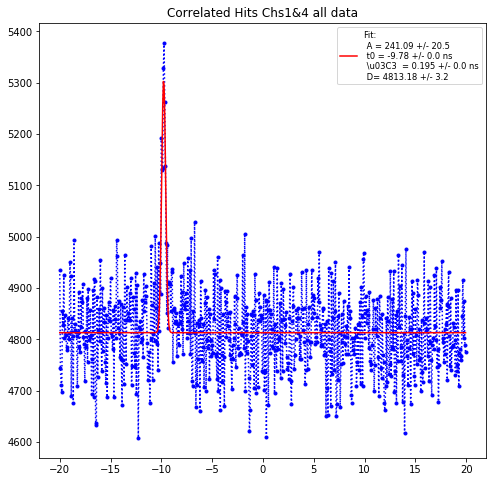

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Correlated Hits Chs1&4 all data')
#plt.xlim([-1,5])
best_vals, covar = curve_fit(gauss, x[:-1], h14_total, p0 = [550, -9, .1, 1650])
ax.plot(x[:-1], h14_total, 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
ax.legend(fontsize = 'small')
globals()["t0_14"] = ((best_vals[1]))
globals()["sigma_14"] = abs((best_vals[2]))

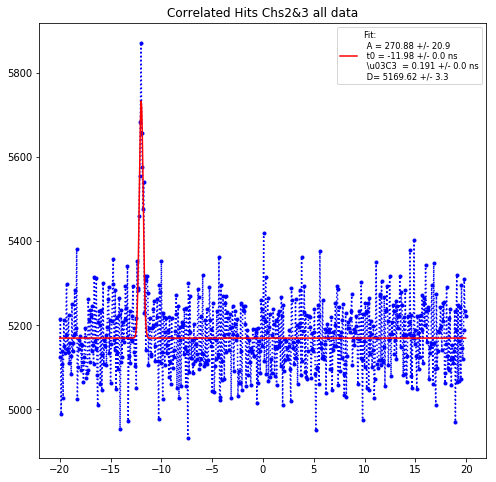

In [14]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Correlated Hits Chs2&3 all data')
#plt.xlim([-1,5])
best_vals, covar = curve_fit(gauss, x[:-1], h23_total, p0 = [200, -12, .1, 6150])
ax.plot(x[:-1], h23_total, 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
ax.legend(fontsize = 'small')
globals()["t0_23"] = ((best_vals[1]))
globals()["sigma_23"] = abs((best_vals[2]))

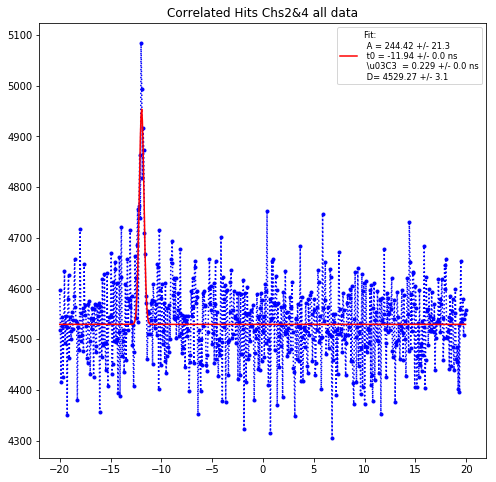

In [16]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Correlated Hits Chs2&4 all data')
#plt.xlim([-1,5])
best_vals, covar = curve_fit(gauss, x[:-1], h24_total, p0 = [500, -12, .1, 1650])
ax.plot(x[:-1], h24_total, 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
ax.legend(fontsize = 'small')
globals()["t0_24"] = ((best_vals[1]))
globals()["sigma_24"] = abs((best_vals[2]))

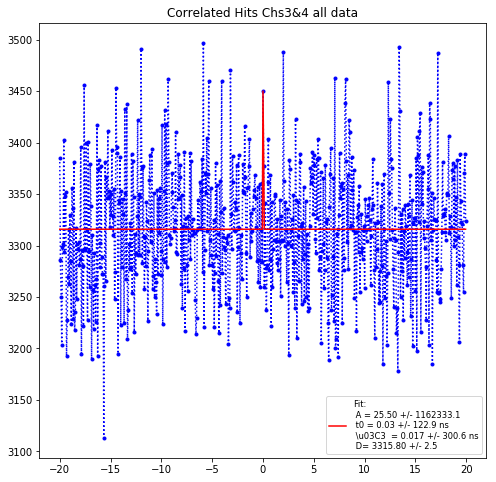

In [17]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Correlated Hits Chs3&4 all data')
#plt.xlim([-1,1])
best_vals, covar = curve_fit(gauss, x[:-1], h34_total, p0 = [100, 0, .1, 9650])
ax.plot(x[:-1], h34_total, 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
ax.legend(fontsize = 'small')
globals()["t0_34"] = ((best_vals[1]))
globals()["sigma_34"] = abs((best_vals[2]))

In [19]:

Sigma_Arr = [sigma_12, sigma_13, sigma_14, sigma_23, sigma_24, sigma_34]
t0_Arr = [t0_12, t0_13, t0_14, t0_23, t0_24, t0_34]

print(Sigma_Arr)
print(t0_Arr)

[0.017651390216682463, 0.17873284122922928, 0.1949807637729734, 0.19090913880562413, 0.2293835593869931, 0.017346067507502477]
[0.9648353287838992, -9.746324736798176, -9.77508983347, -11.981504937082113, -11.944345214598663, 0.029789519256668517]


In [20]:
# SAVES SIGMA RANGE OF HBT PEAK AND t0

np.save('/home/zhi/SULI21/data_analysis/analyzed_data/RL_Sigma_Arr', Sigma_Arr)
np.save('/home/zhi/SULI21/data_analysis/analyzed_data/RL_t0_Arr', t0_Arr)

In [221]:
# Original pp_vect ANALYSIS
def pp_vect(File_start, File_end, sigma_range):
    """ Create and save array (see master_array below for details) with information about correlated pair rate distributions for data with after-pulsing removed.
        Parameters: File_start: Starting file for analysis
                    File_end: Ending file for analysis
                    sigma_range: +/- sigma range in which to search for pairs
        Returns:    master_arr: Four-column array:
                        1. The first column is the time of the first hit in a pair of hits that falls within the indicated sigma range for a given channel combination
                        2. The second column is the dT to the next hit that matches the sigma range criterion
                        3. The third column is the first channel in the pair
                        4. The fourth column is the second channel in the pair
    """
    # Master time and channel arrays for the current set of 4 files
    t = []; c = []

    # Read in all data files
    for i in range(File_start, File_end+1):
        t = np.concatenate((t,(np.load('File_'+np.str(i)+'/Data/t_noAP.npy'))), axis = None)
        c = np.concatenate((c,(np.load('File_'+np.str(i)+'/Data/c_noAP.npy'))), axis = None)
    
    
    # Load in the sigma and t0 arrays. Recall that each of these arrays is six elements long, one for each two-channel combination in the order (1&2, 1&3, 1&4, 2&3, 2&4, 3&4)
    sigma_arr = np.load('Data/Sigma_Arr_noAP.npy')
    t0_arr = np.load('Data/t0_Arr_noAP.npy')
    
    # Lower and upper edges of the dT window of interest, in picoseconds
    dt_lower = (t0_arr - (sigma_range * sigma_arr)) * 1e3
    dt_upper = (t0_arr + (sigma_range * sigma_arr)) * 1e3
    
    
    dt12 = np.where(np.logical_and(t[1:]-t[:-1]< dt_upper[0],np.logical_and(t[1:]-t[:-1]>dt_lower[0],np.logical_and(c[1:]==1,c[:-1]==2))));
    dt13 = np.where(np.logical_and(t[:-1]-t[1:]< dt_upper[1],np.logical_and(t[:-1]-t[1:]>dt_lower[1],np.logical_and(c[1:]==3,c[:-1]==1))));
    dt14 = np.where(np.logical_and(t[:-1]-t[1:]< dt_upper[2],np.logical_and(t[:-1]-t[1:]>dt_lower[2],np.logical_and(c[1:]==4,c[:-1]==1))));
    dt23 = np.where(np.logical_and(t[:-1]-t[1:]< dt_upper[3],np.logical_and(t[:-1]-t[1:]>dt_lower[3],np.logical_and(c[1:]==3,c[:-1]==2))));
    dt24 = np.where(np.logical_and(t[:-1]-t[1:]< dt_upper[4],np.logical_and(t[:-1]-t[1:]>dt_lower[4],np.logical_and(c[1:]==4,c[:-1]==2))));
    dt34_1 = np.where(np.logical_and(t[1:]-t[:-1]< dt_upper[5],np.logical_and(t[1:]-t[:-1]>0,np.logical_and(c[1:]==3,c[:-1]==4))));
    dt34_2 = np.where(np.logical_and(t[:-1]-t[1:]>dt_lower[5],np.logical_and(c[1:]==4,c[:-1]==3)));
    
    first_hit_time = np.concatenate((t[dt12[0]],t[dt13[0]],t[dt14[0]],t[dt23[0]],t[dt24[0]],t[dt34_1[0]],t[dt34_2[0]]),axis=None)


    dT = np.concatenate((t[np.asarray(dt12[0])+1]-t[np.asarray(dt12[0])],\
                    t[np.asarray(dt13[0])]-t[np.asarray(dt13[0])+1],\
                    t[np.asarray(dt14[0])]-t[np.asarray(dt14[0])+1],\
                    t[np.asarray(dt23[0])]-t[np.asarray(dt23[0])+1],\
                    t[np.asarray(dt24[0])]-t[np.asarray(dt24[0])+1],\
                    t[np.asarray(dt34_1[0]+1)]-t[np.asarray(dt34_1[0])],\
                    t[np.asarray(dt34_2[0])]-t[np.asarray(dt34_2[0])+1]),axis=None)

    chan1 = np.concatenate(
        (np.full(shape=len(dt12[0]),fill_value=2,dtype=np.int),
        np.full(shape=len(dt13[0])+len(dt14[0]),fill_value=1,dtype=np.int),
        np.full(shape=len(dt23[0])+len(dt24[0]),fill_value=2,dtype=np.int),
        np.full(shape=len(dt34_1[0]),fill_value=4,dtype=np.int),
        np.full(shape=len(dt34_2[0]),fill_value=3,dtype=np.int),),axis = None)
    
    chan2 = np.concatenate(
        (np.full(shape=len(dt12[0]),fill_value=1,dtype=np.int),
        np.full(shape=len(dt13[0]),fill_value=3,dtype=np.int),
        np.full(shape=len(dt14[0]),fill_value=4,dtype=np.int),
        np.full(shape=len(dt23[0]),fill_value=3,dtype=np.int),
        np.full(shape=len(dt24[0]),fill_value=4,dtype=np.int),
        np.full(shape=len(dt34_1[0]),fill_value=3,dtype=np.int),
        np.full(shape=len(dt34_2[0]),fill_value=4,dtype=np.int),),axis = None)
    
    
    first_hit_time_ordered = first_hit_time[np.argsort(first_hit_time, axis = None)]
    dT_ordered = dT[np.argsort(first_hit_time, axis = None)]
    chan1_ordered = chan1[np.argsort(first_hit_time, axis = None)]
    chan2_ordered = chan2[np.argsort(first_hit_time, axis = None)]
    
    master_arr = np.column_stack((first_hit_time_ordered,dT_ordered,chan1_ordered,chan2_ordered))
    
    np.savetxt('pp_results/p-p_'+np.str(File_start)+'-'+np.str(File_end)+'_noAP_sigma_range='+np.str(sigma_range),master_arr)
    return(master_arr)





def pp_vect(File_start, File_end):
    """ Create and save array (see master_array below for details) with information about uncorrelated pair rate distributions for data without after-pulsing removed.
        Parameters: File_start: Starting file for analysis
                    File_end: Ending file for analysis
                    sigma_range: +/- sigma range in which to search for pairs
        Returns:    master_arr: Four-column array:
                        1. The first column is the time of the first hit in a pair of hits that falls within the indicated sigma range for a given channel combination
                        2. The second column is the dT to the next hit that matches the sigma range criterion
                        3. The third column is the first channel in the pair
                        4. The fourth column is the second channel in the pair
    """
    # Master time and channel arrays for the current set of 4 files
    t = []; c = []

    # Read in all data files
    for i in range(File_start, File_end+1):
        t = np.concatenate((t,(np.load('File_'+np.str(i)+'/Data/t.npy'))), axis = None)
        c = np.concatenate((c,(np.load('File_'+np.str(i)+'/Data/c.npy'))), axis = None)
    
    
    # Load in the sigma and t0 arrays. Recall that each of these arrays is six elements long, one for each two-channel combination in the order (1&2, 1&3, 1&4, 2&3, 2&4, 3&4)
    sigma_arr = np.load('Data/Sigma_Arr.npy')
    t0_arr = np.load('Data/t0_Arr.npy')
    
    # Lower and upper edges of the dT window of interest, in picoseconds
    dt_lower = (t0_arr - (sigma_range * sigma_arr)) * 1e3
    dt_upper = (t0_arr + (sigma_range * sigma_arr)) * 1e3
    
    
    dt12 = np.where(np.logical_and(t[1:]-t[:-1]< dt_upper[0],np.logical_and(t[1:]-t[:-1]>dt_lower[0],np.logical_and(c[1:]==1,c[:-1]==2))));
    dt13 = np.where(np.logical_and(t[:-1]-t[1:]< dt_upper[1],np.logical_and(t[:-1]-t[1:]>dt_lower[1],np.logical_and(c[1:]==3,c[:-1]==1))));
    dt14 = np.where(np.logical_and(t[:-1]-t[1:]< dt_upper[2],np.logical_and(t[:-1]-t[1:]>dt_lower[2],np.logical_and(c[1:]==4,c[:-1]==1))));
    dt23 = np.where(np.logical_and(t[:-1]-t[1:]< dt_upper[3],np.logical_and(t[:-1]-t[1:]>dt_lower[3],np.logical_and(c[1:]==3,c[:-1]==2))));
    dt24 = np.where(np.logical_and(t[:-1]-t[1:]< dt_upper[4],np.logical_and(t[:-1]-t[1:]>dt_lower[4],np.logical_and(c[1:]==4,c[:-1]==2))));
    dt34_1 = np.where(np.logical_and(t[1:]-t[:-1]< dt_upper[5],np.logical_and(t[1:]-t[:-1]>0,np.logical_and(c[1:]==3,c[:-1]==4))));
    dt34_2 = np.where(np.logical_and(t[:-1]-t[1:]< 0,np.logical_and(t[:-1]-t[1:]>dt_lower[5],np.logical_and(c[1:]==4,c[:-1]==3))));
    
    first_hit_time = np.concatenate((t[dt12[0]],t[dt13[0]],t[dt14[0]],t[dt23[0]],t[dt24[0]],t[dt34_1[0]],t[dt34_2[0]]),axis=None)


    dT = np.concatenate((t[np.asarray(dt12[0])+1]-t[np.asarray(dt12[0])],\
                    t[np.asarray(dt13[0])]-t[np.asarray(dt13[0])+1],\
                    t[np.asarray(dt14[0])]-t[np.asarray(dt14[0])+1],\
                    t[np.asarray(dt23[0])]-t[np.asarray(dt23[0])+1],\
                    t[np.asarray(dt24[0])]-t[np.asarray(dt24[0])+1],\
                    t[np.asarray(dt34_1[0]+1)]-t[np.asarray(dt34_1[0])],\
                    t[np.asarray(dt34_2[0])]-t[np.asarray(dt34_2[0])+1]),axis=None)

    chan1 = np.concatenate(
        (np.full(shape=len(dt12[0]),fill_value=2,dtype=np.int),
        np.full(shape=len(dt13[0])+len(dt14[0]),fill_value=1,dtype=np.int),
        np.full(shape=len(dt23[0])+len(dt24[0]),fill_value=2,dtype=np.int),
        np.full(shape=len(dt34_1[0]),fill_value=4,dtype=np.int),
        np.full(shape=len(dt34_2[0]),fill_value=3,dtype=np.int),),axis = None)
    
    chan2 = np.concatenate(
        (np.full(shape=len(dt12[0]),fill_value=1,dtype=np.int),
        np.full(shape=len(dt13[0]),fill_value=3,dtype=np.int),
        np.full(shape=len(dt14[0]),fill_value=4,dtype=np.int),
        np.full(shape=len(dt23[0]),fill_value=3,dtype=np.int),
        np.full(shape=len(dt24[0]),fill_value=4,dtype=np.int),
        np.full(shape=len(dt34_1[0]),fill_value=3,dtype=np.int),
        np.full(shape=len(dt34_2[0]),fill_value=4,dtype=np.int),),axis = None)
    
    
    first_hit_time_ordered = first_hit_time[np.argsort(first_hit_time, axis = None)]
    dT_ordered = dT[np.argsort(first_hit_time, axis = None)]
    chan1_ordered = chan1[np.argsort(first_hit_time, axis = None)]
    chan2_ordered = chan2[np.argsort(first_hit_time, axis = None)]
    
    master_arr = np.column_stack((first_hit_time_ordered,dT_ordered,chan1_ordered,chan2_ordered))
    
    np.savetxt('pp_results/p-p_'+np.str(File_start)+'-'+np.str(File_end)+'_sigma_range='+np.str(sigma_range),master_arr)
    return(master_arr)

In [8]:
# NEW ANALYSIS

def pp_vect_new(File_start,File_end,sigma_range):
    """ 
    Create and save array (see master_array below for details) with information about correlated pair rate distributions for data with after-pulsing removed.
        Parameters: File_start: Starting file for analysis
                    File_end: Ending file for analysis
                    sigma_range: +/- sigma range in which to search for pairs
        Returns:    master_arr: Four-column array:
                        1. The first column is the time of the first hit in a pair of hits that falls within the indicated sigma range for a given channel combination
                        2. The second column is the dT to the next hit that matches the sigma range criterion
                        3. The third column is the first channel in the pair
                        4. The fourth column is the second channel in the pair
    """
    # Master time and channel arrays for the current set of 4 files
    t = []; c = []    # 

    # Read in all data files
    for i in range(File_start, File_end+1):
        t = np.concatenate((t,(np.load('/home/zhi/SULI21/data_analysis/analyzed_data/RL_t_60min_'+ np.str(i) +'.npy'))),axis=None)
        c = np.concatenate((c,(np.load('/home/zhi/SULI21/data_analysis/analyzed_data/RL_c_60min_'+ np.str(i) +'.npy'))),axis=None)
    

 
    sigma_arr = np.load('/home/zhi/SULI21/data_analysis/analyzed_data/RL_Sigma_Arr.npy')
    t0_arr = np.load('/home/zhi/SULI21/data_analysis/analyzed_data/RL_t0_Arr.npy')
    
    # Lower and upper edges of the dT window of interest, in picoseconds
    dt_lower = (t0_arr - (sigma_range * sigma_arr)) * 1e3    # t originally in ns, t +/- #sigma
    dt_upper = (t0_arr + (sigma_range * sigma_arr)) * 1e3
    
    # Initial filtering: same as before:
    N = t.size
    dt12=[]
    j=1
    length = 1
    
    
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==1, c[:-j]==2)))[0])
        cond = np.where(np.logical_and(t[indices+j]-t[indices] > dt_lower[0],t[indices+j]-t[indices] < dt_upper[0]))
        dt12 = np.concatenate((dt12,(t[indices][cond])), axis = None)   # record the coincidence time of the 
        length = len(indices)                                   # of the first hit coincidence photon
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==2, c[:-j]==1)))[0])
        cond = np.where(np.logical_and(t[indices]-t[indices+j] > dt_lower[0],t[indices]-t[indices+j] < dt_upper[0]))  
        dt12 = np.concatenate((dt12,(t[indices+j][cond])), axis = None)
        length = len(indices)
        j+=1
        
        
        
    dt13=[]
    j=1
    length = 1
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==1, c[:-j]==3)))[0])
        cond = np.where(np.logical_and(t[indices+j]-t[indices] > dt_lower[1],t[indices+j]-t[indices] < dt_upper[1]))
        dt13 = np.concatenate((dt13,(t[indices][cond])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==3, c[:-j]==1)))[0])
        cond = np.where(np.logical_and(t[indices]-t[indices+j] > dt_lower[1],t[indices]-t[indices+j] < dt_upper[1]))
        dt13 = np.concatenate((dt13,(t[indices+j][cond])), axis = None)
        length = len(indices)
        j+=1
        
    
    dt14=[]
    j=1
    length = 1
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==1, c[:-j]==4)))[0])
        cond = np.where(np.logical_and(t[indices+j]-t[indices] > dt_lower[2],t[indices+j]-t[indices] < dt_upper[2]))
        dt14 = np.concatenate((dt14,(t[indices][cond])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==4, c[:-j]==1)))[0])
        cond = np.where(np.logical_and(t[indices]-t[indices+j] > dt_lower[2],t[indices]-t[indices+j] < dt_upper[2]))
        dt14 = np.concatenate((dt14,(t[indices+j][cond])), axis = None)
        length = len(indices)
        j+=1
        
        
        
    dt23=[]
    j=1
    length = 1
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==2, c[:-j]==3)))[0])
        cond = np.where(np.logical_and(t[indices+j]-t[indices] > dt_lower[3],t[indices+j]-t[indices] < dt_upper[3]))
        dt23 = np.concatenate((dt23,(t[indices][cond])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==3, c[:-j]==2)))[0])
        cond = np.where(np.logical_and(t[indices]-t[indices+j] > dt_lower[3],t[indices]-t[indices+j] < dt_upper[3]))
        dt23 = np.concatenate((dt23,(t[indices+j][cond])), axis = None)
        length = len(indices)
        j+=1

        
        
    dt24=[]
    j=1
    length = 1
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==2, c[:-j]==4)))[0])
        cond = np.where(np.logical_and(t[indices+j]-t[indices] > dt_lower[4],t[indices+j]-t[indices] < dt_upper[4]))
        dt24 = np.concatenate((dt24,(t[indices][cond])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==4, c[:-j]==2)))[0])
        cond = np.where(np.logical_and(t[indices]-t[indices+j] > dt_lower[4],t[indices]-t[indices+j] < dt_upper[4]))
        dt24 = np.concatenate((dt24,(t[indices+j][cond])), axis = None)
        length = len(indices)
        j+=1
        
        
    
    dt34=[]
    j=1
    length = 1
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==3, c[:-j]==4)))[0])
        cond = np.where(np.logical_and(t[indices+j]-t[indices] > dt_lower[5],t[indices+j]-t[indices] < dt_upper[5]))
        dt34 = np.concatenate((dt34,(t[indices][cond])), axis = None) 
        length = len(indices)
        j+=1

    j=1
    length = 1   
    while length!=0:
        indices = np.asarray(np.where(np.logical_and(t[j:]-t[:-j]<=15e3, np.logical_and(c[j:]==4, c[:-j]==3)))[0])
        cond = np.where(np.logical_and(t[indices]-t[indices+j] > dt_lower[5],t[indices]-t[indices+j] < dt_upper[5]))
        dt34 = np.concatenate((dt34,(t[indices+j][cond])), axis = None)
        length = len(indices)
        j+=1
    
    
    chan1 = np.concatenate(
        (np.full(shape=len(dt12),fill_value=1,dtype=np.int),
        np.full(shape=len(dt13),fill_value=1,dtype=np.int),
        np.full(shape=len(dt14),fill_value=1,dtype=np.int),
        np.full(shape=len(dt23),fill_value=2,dtype=np.int),
        np.full(shape=len(dt24),fill_value=2,dtype=np.int),
        np.full(shape=len(dt34),fill_value=3,dtype=np.int)),axis = None)
    
    # returns arryao of second channel which corresponds to [j:]
    chan2 = np.concatenate(
        (np.full(shape=len(dt12),fill_value=2,dtype=np.int),
        np.full(shape=len(dt13),fill_value=3,dtype=np.int),
        np.full(shape=len(dt14),fill_value=4,dtype=np.int),
        np.full(shape=len(dt23),fill_value=3,dtype=np.int),
        np.full(shape=len(dt24),fill_value=4,dtype=np.int),
        np.full(shape=len(dt34),fill_value=4,dtype=np.int)),axis = None)
    

    
    first_hit = np.concatenate((dt12,dt13,dt14,dt23,dt24,dt34),axis=None)

    first_hit_ordered = first_hit[np.argsort(first_hit,axis=None)]
    chan1_ordered = chan1[np.argsort(first_hit, axis=None)]
    chan2_ordered = chan2[np.argsort(first_hit, axis=None)]
    
    master = np.column_stack((first_hit_ordered,chan1_ordered,chan2_ordered)) #[[t1,ch1,ch2],[t2,ch1,ch2]...]
    print(master.shape)
    np.savetxt('/home/zhi/SULI21/data_analysis/analyzed_data/pp_newRL_60min_'+np.str(File_start)+'-'+np.str(File_end)+'_2.0', master)
    
    return master

In [9]:
# CALLS NEW pp_vect
master = pp_vect_new(0,9,2.0)
for i in range(1,6):
        master = np.concatenate((master,pp_vect_new(10*i,10*i+9, 2.0)), axis = 0)

(45052, 3)
(43684, 3)
(43597, 3)
(43222, 3)
(43499, 3)
(42809, 3)


In [ ]:
# CALLS OLD pp_vect
master = pp_vect(0,9,2.0)
for i in range(1,6):
        master = np.concatenate((master,pp_vect(10*i,10*i+9, 2.0)), axis = 0)


In [53]:
# Loading back files 
master = np.loadtxt('/home/zhi/SULI21/data_analysis/analyzed_data/pp_newRL_60min_0-9_2.0')
for i in range(1,6):
    master = np.concatenate((master,np.loadtxt('/home/zhi/SULI21/data_analysis/analyzed_data/pp_newRL_60min_' +np.str(10*i)+'-'+np.str(10*i+9)+'_2.0')),axis=0)

In [37]:
# FOR OLD ANALYSIS
pp12 = master[np.asarray(np.where(np.logical_and(master[:,2]==2, master[:,3]==1))),0]
pp13 = master[np.asarray(np.where(np.logical_and(master[:,2]==1, master[:,3]==3))),0]
pp14 = master[np.asarray(np.where(np.logical_and(master[:,2]==1, master[:,3]==4))),0]
pp23 = master[np.asarray(np.where(np.logical_and(master[:,2]==2, master[:,3]==3))),0]
pp24 = master[np.asarray(np.where(np.logical_and(master[:,2]==2, master[:,3]==4))),0]
pp34 = master[np.asarray(np.where(np.logical_and(master[:,2]==3, master[:,3]==4))),0]
pp34 = np.concatenate((pp34, master[np.asarray(np.where(np.logical_and(master[:,2]==4, master[:,3]==3))),0]),axis=None)

IndexError: index 3 is out of bounds for axis 1 with size 3

In [62]:
# FOR NEW ANALYSIS

pp12 = master[np.asarray(np.where(np.logical_and(master[:,1]==1, master[:,2]==2))),0]
pp13 = master[np.asarray(np.where(np.logical_and(master[:,1]==1, master[:,2]==3))),0]
pp14 = master[np.asarray(np.where(np.logical_and(master[:,1]==1, master[:,2]==4))),0]
pp23 = master[np.asarray(np.where(np.logical_and(master[:,1]==2, master[:,2]==3))),0]
pp24 = master[np.asarray(np.where(np.logical_and(master[:,1]==2, master[:,2]==4))),0]
pp34 = master[np.asarray(np.where(np.logical_and(master[:,1]==3, master[:,2]==4))),0]

In [55]:
exp_len = (max(pp12[0,-1],pp13[0,-1],pp14[0,-1],pp23[0,-1],pp24[0,-1],pp34[0,-1])-min(pp12[0,0],pp13[0,0],pp14[0,0],pp23[0,0],pp24[0,0],pp34[0,0]))/1e12/60
nbins = int(exp_len*3)
#nbins = 214
nbins

IndexError: index -1 is out of bounds for axis 1 with size 0

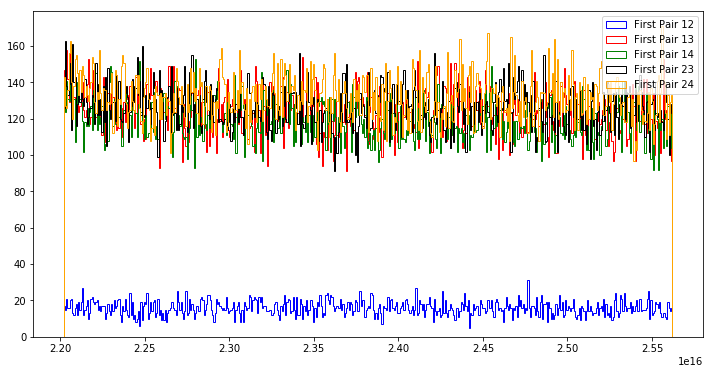

In [63]:
fig,ax = plt.subplots(figsize=(12,6))
#plt.xlim([2.2*10**(16),2.6*10**(16)])
h12 = ax.hist(pp12[0], bins = nbins, histtype = 'step', color = 'blue', label = 'First Pair 12');
h13 = ax.hist(pp13[0], bins = nbins, histtype = 'step', color = 'red', label = 'First Pair 13');
h14 = ax.hist(pp14[0], bins = nbins, histtype = 'step', color = 'green', label = 'First Pair 14');
h23 = ax.hist(pp23[0], bins = nbins, histtype = 'step', color = 'black', label = 'First Pair 23');
h24 = ax.hist(pp24[0], bins = nbins, histtype = 'step', color = 'orange', label = 'First Pair 24');
#h34 = ax.hist(pp34[0], bins = nbins, histtype = 'step', color = 'magenta', label = 'First Pair 34');
ax.legend()

(-155, 155)

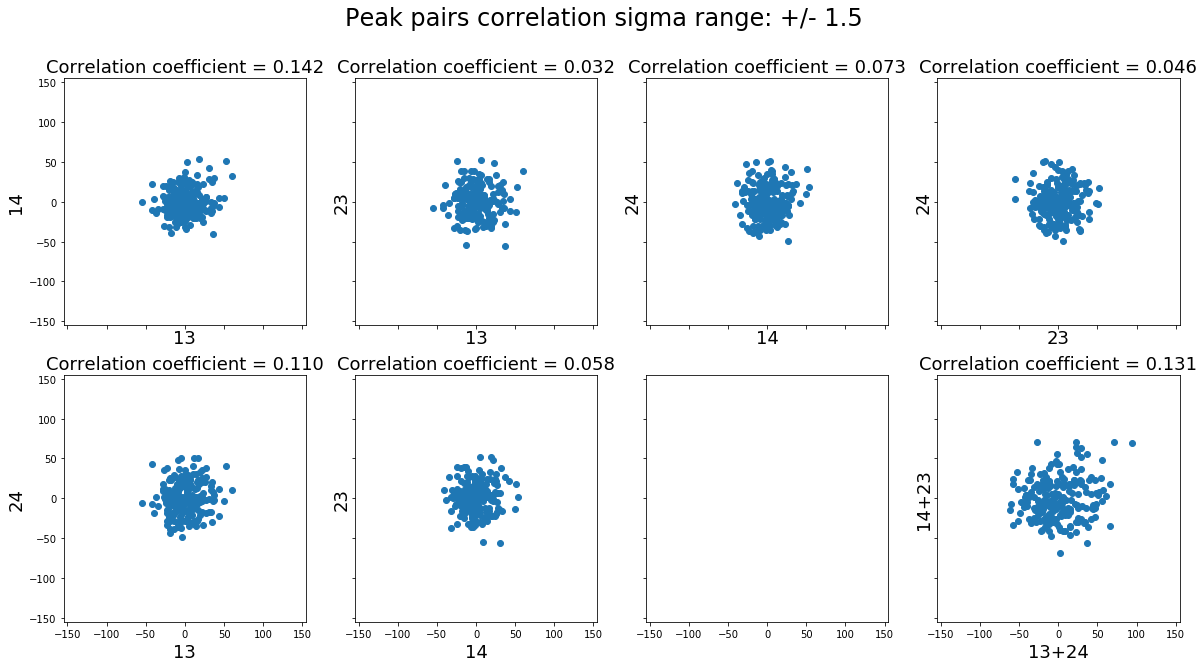

In [295]:
# FOR OLD ANALYSIS: Use results from pp_vect for this

sigma_range = 1.5
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(figsize = (20,10), nrows = 2, ncols = 4, sharex = True, sharey=True)
plt.suptitle('Peak pairs correlation sigma range: +/- ' + np.str(sigma_range), fontsize = 24)

x1 = (h13[0][:]-h13[0][:].mean())
x2 = (h14[0][:]-h14[0][:].mean())
ax1.scatter(x1,x2, marker='o');
ax1.set_title('Correlation coefficient = %.3f' %(np.corrcoef([x1,x2])[0,1]), fontsize = 18)
ax1.set_xlabel('13', fontsize = 18)
ax1.set_ylabel('14', fontsize = 18)

x1 = (h13[0][:]-h13[0][:].mean())
x2 = (h23[0][:]-h23[0][:].mean())
ax2.scatter(x1,x2, marker='o');
ax2.set_title('Correlation coefficient = %.3f' %(np.corrcoef([x1,x2])[0,1]), fontsize = 18)
ax2.set_xlabel('13', fontsize = 18)
ax2.set_ylabel('23', fontsize = 18)

x1 = (h14[0][:]-h14[0][:].mean())
x2 = (h24[0][:]-h24[0][:].mean())
ax3.scatter(x1,x2, marker='o');
ax3.set_title('Correlation coefficient = %.3f' %(np.corrcoef([x1,x2])[0,1]), fontsize = 18)
ax3.set_xlabel('14', fontsize = 18)
ax3.set_ylabel('24', fontsize = 18)

x1 = (h23[0][:]-h23[0][:].mean())
x2 = (h24[0][:]-h24[0][:].mean())
ax4.scatter(x1,x2, marker='o');
ax4.set_title('Correlation coefficient = %.3f' %(np.corrcoef([x1,x2])[0,1]), fontsize = 18)
ax4.set_xlabel('23', fontsize = 18)
ax4.set_ylabel('24', fontsize = 18)

x1 = (h13[0][:]-h13[0][:].mean())
x2 = (h24[0][:]-h24[0][:].mean())
ax5.scatter(x1,x2, marker='o');
ax5.set_title('Correlation coefficient = %.3f' %(np.corrcoef([x1,x2])[0,1]), fontsize = 18)
ax5.set_xlabel('13', fontsize = 18)
ax5.set_ylabel('24', fontsize = 18)

x1 = (h14[0][:]-h14[0][:].mean())
x2 = (h23[0][:]-h23[0][:].mean())
ax6.scatter(x1,x2, marker='o');
ax6.set_title('Correlation coefficient = %.3f' %(np.corrcoef([x1,x2])[0,1]), fontsize = 18)
ax6.set_xlabel('14', fontsize = 18)
ax6.set_ylabel('23', fontsize = 18)

x1 = (h13[0][:]+h24[0][:])-(h13[0][:].mean()+h24[0][:].mean())
x2 = (h14[0][:]+h23[0][:])-(h14[0][:].mean()+h23[0][:].mean())
ax8.scatter(x1,x2, marker='o');
ax8.set_title('Correlation coefficient = %.3f' %(np.corrcoef([x1,x2])[0,1]), fontsize = 18)
ax8.set_xlabel('13+24', fontsize = 18)
ax8.set_ylabel('14+23', fontsize = 18)


ax1.set_xlim(-155,155)
ax1.set_ylim(-155,155)

In [64]:
#NEW ANALYSIS: use results from pp_vect_new for this

N = pp13[0].size
M = pp24[0].size
arr_range = np.linspace(0,M,10).astype(int)
start_index = 0
dt_1324 = np.array([])

for end_index in arr_range[1:]:
    L = end_index - start_index
    #print(M)
    pp13_mat = np.tile(pp13[0],(L,1)).T
    pp24_mat = np.tile(pp24[0][start_index:end_index],(N,1))
    d_t = (pp13_mat - pp24_mat).flatten()
    d_t = d_t[np.where(abs(d_t) < 2e10)]
    dt_1324 = np.concatenate((dt_1324,d_t))
    #dt = np.concatenate((dt, (pp23_mat - pp14_mat).flatten()))
    #np.savetxt('/home/zhi/SULI21/data_analysis/analyzed_data/test' + str(start_index) + '_' + str(end_index),d_t)
    start_index = end_index
    pp13_mat = None
    pp24_mat = None
    d_t = None

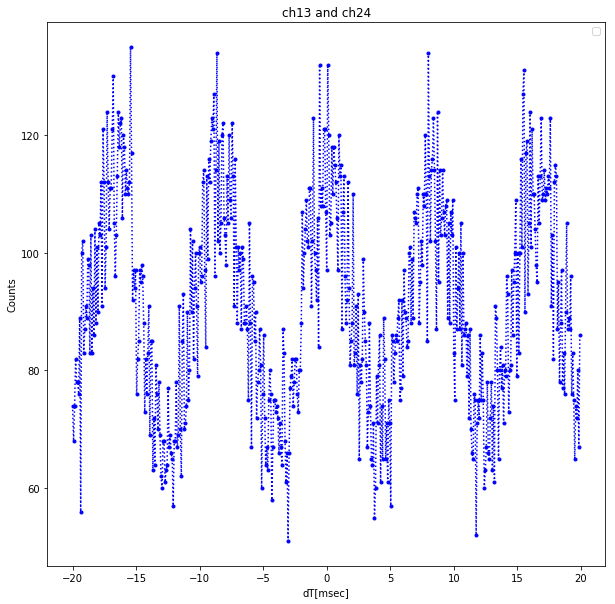

In [65]:
def gauss(t, A, t0, sigma, D):
    return (A/(sigma*np.sqrt(2*np.pi)))*np.exp(-((t-t0)**2)/(2*sigma**2)) + D
nbins = 500
h = np.histogram(dt_1324, bins = nbins)[0]
x = np.linspace(-20,20, nbins + 1)   # -20 msec to 20 msec
fig, ax = plt.subplots(figsize=(10,10))
#best_vals, covar = curve_fit(gauss, x[:-1], h, p0 = [20, 0, .01, 20])
ax.plot(x[:-1],h,'b.:')
#ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ms\n sigma  = %.3f +/- %.1f ms\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
plt.xlabel('dT[msec]');plt.ylabel('Counts')
plt.title('ch13 and ch24')
plt.legend()

In [20]:
N = pp14[0].size
M = pp23[0].size
arr_range = np.linspace(0,M,10).astype(int)
start_index = 0
dt_1423 = np.array([])

for end_index in arr_range[1:]:
    L = end_index - start_index
    #print(M)
    pp14_mat = np.tile(pp14[0],(L,1)).T
    pp23_mat = np.tile(pp23[0][start_index:end_index],(N,1))
    d_t = (pp14_mat - pp23_mat).flatten()
    d_t = d_t[np.where(abs(d_t) < 2e10)]
    dt_1423 = np.concatenate((dt_1423,d_t))
    #dt = np.concatenate((dt, (pp23_mat - pp14_mat).flatten()))
    #np.savetxt('/home/zhi/SULI21/data_analysis/analyzed_data/test' + str(start_index) + '_' + str(end_index),d_t)
    start_index = end_index
    pp14_mat = None
    pp23_mat = None
    d_t = None

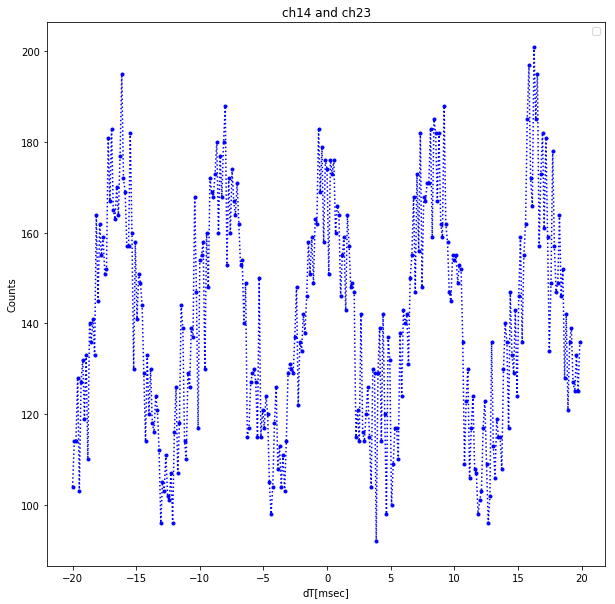

In [22]:
def gauss(t, A, t0, sigma, D):
    return (A/(sigma*np.sqrt(2*np.pi)))*np.exp(-((t-t0)**2)/(2*sigma**2)) + D
nbins =500
h = np.histogram(dt_1423, bins = nbins)[0]
x = np.linspace(-20,20, nbins + 1)   # -2 sec to 2 msec
fig, ax = plt.subplots(figsize=(10,10))
#ax.hist(dt,bins = nbins)
#best_vals, covar = curve_fit(gauss, x[:-1], h, p0 = [20, 0, .01, 20])
ax.plot(x[:-1],h,'b.:')
#ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ms\n sigma  = %.3f +/- %.1f ms\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
plt.xlabel('dT[msec]');plt.ylabel('Counts')
plt.title('ch14 and ch23')
plt.legend()

In [23]:
N = pp14[0].size
M = pp24[0].size
arr_range = np.linspace(0,M,20).astype(int)
start_index = 0
dt_1424 = np.array([])

for end_index in arr_range[1:]:
    L = end_index - start_index
    #print(M)
    pp14_mat = np.tile(pp14[0],(L,1)).T
    pp24_mat = np.tile(pp24[0][start_index:end_index],(N,1))
    d_t = (pp14_mat - pp24_mat).flatten()
    d_t = d_t[np.where(abs(d_t) < 2e10)]
    dt_1424 = np.concatenate((dt_1424,d_t))
    start_index = end_index
    pp14_mat = None
    pp24_mat = None
    d_t = None

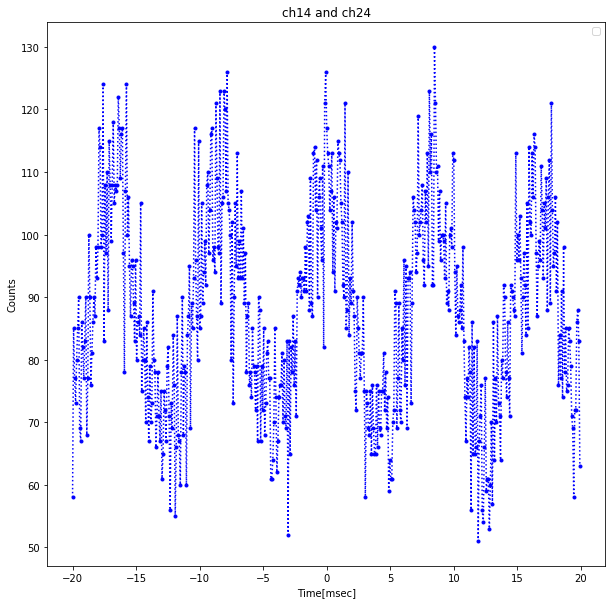

In [24]:
def gauss(t, A, t0, sigma, D):
    return (A/(sigma*np.sqrt(2*np.pi)))*np.exp(-((t-t0)**2)/(2*sigma**2)) + D
nbins = 500
h = np.histogram(dt_1424, bins = nbins)[0]
x = np.linspace(-20,20, nbins + 1)   # -2sec to 2sec
fig, ax = plt.subplots(figsize=(10,10))
#ax.hist(dt,bins = nbins)
#best_vals, covar = curve_fit(gauss, x[:-1], h, p0 = [20, 0, .01, 20])
ax.plot(x[:-1],h,'b.:')
#ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ms\n sigma  = %.3f +/- %.1f ms\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
plt.xlabel('Time[msec]');plt.ylabel('Counts')
plt.title('ch14 and ch24')
plt.legend()

In [25]:
N = pp13[0].size
M = pp23[0].size
arr_range = np.linspace(0,M,20).astype(int)
start_index = 0
dt_1323 = np.array([])

for end_index in arr_range[1:]:
    L = end_index - start_index
    #print(M)
    pp13_mat = np.tile(pp13[0],(L,1)).T
    pp23_mat = np.tile(pp23[0][start_index:end_index],(N,1))
    d_t = (pp13_mat - pp23_mat).flatten()
    d_t = d_t[np.where(abs(d_t) < 2e10)]
    dt_1323 = np.concatenate((dt_1323,d_t))
    start_index = end_index
    pp13_mat = None
    pp23_mat = None
    d_t = None

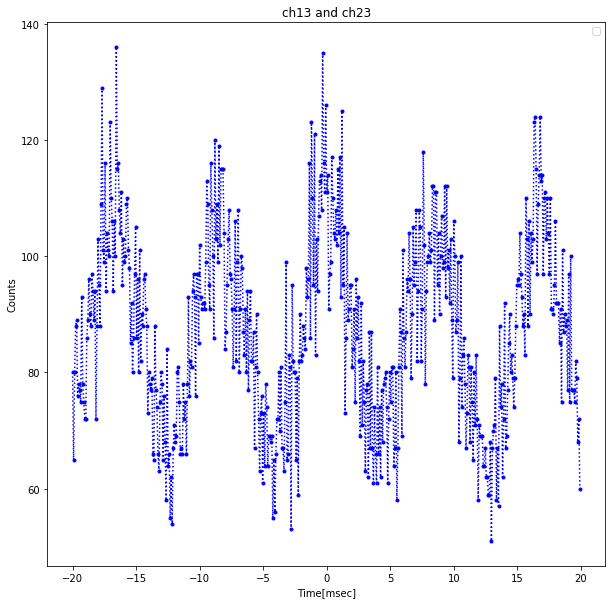

In [28]:
def gauss(t, A, t0, sigma, D):
    return (A/(sigma*np.sqrt(2*np.pi)))*np.exp(-((t-t0)**2)/(2*sigma**2)) + D
nbins = 500
h = np.histogram(dt_1323, bins = nbins)[0]
x = np.linspace(-20,20, nbins + 1)   # -2sec to 2sec
fig, ax = plt.subplots(figsize=(10,10))
#best_vals, covar = curve_fit(gauss, x[:-1], h, p0 = [20, 0, .01, 20])
ax.plot(x[:-1],h,'b.:')
#ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ms\n sigma  = %.3f +/- %.1f ms\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
plt.xlabel('Time[msec]');plt.ylabel('Counts')
plt.title('ch13 and ch23')
plt.legend()

In [47]:
N = pp12[0].size
M = pp34.size
arr_range = np.linspace(0,M,10).astype(int)
start_index = 0
dt_1234 = np.array([])

for end_index in arr_range[1:]:
    L = end_index - start_index
    #print(end_index)
    pp12_mat = np.tile(pp12[0],(L,1)).T
    pp34_mat = np.tile(pp34[start_index:end_index],(N,1))
    d_t = (pp12_mat - pp34_mat).flatten()
    d_t = d_t[np.where(abs(d_t) < 2e10)]
    dt_1234 = np.concatenate((dt_1234,d_t))
    #dt = np.concatenate((dt, (pp23_mat - pp14_mat).flatten()))
    #np.savetxt('/home/zhi/SULI21/data_analysis/analyzed_data/test' + str(start_index) + '_' + str(end_index),d_t)
    start_index = end_index
    pp12_mat = None
    pp34_mat = None
    d_t = None
    
    
    

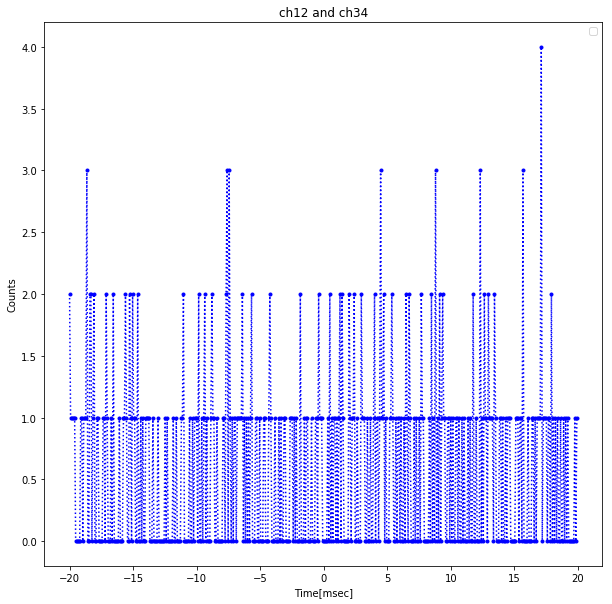

In [48]:
def gauss(t, A, t0, sigma, D):
    return (A/(sigma*np.sqrt(2*np.pi)))*np.exp(-((t-t0)**2)/(2*sigma**2)) + D
nbins = 500
h = np.histogram(dt_1234, bins = nbins)[0]
x = np.linspace(-20,20, nbins + 1)   # -2sec to 2sec
fig, ax = plt.subplots(figsize=(10,10))
#ax.hist(dt,bins = nbins)
#best_vals, covar = curve_fit(gauss, x[:-1], h, p0 = [20, 0, .01, 20])
ax.plot(x[:-1],h,'b.:')
#ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ms\n sigma  = %.3f +/- %.1f ms\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
plt.xlabel('Time[msec]');plt.ylabel('Counts')
#plt.xlim([-0.2,0.2])
plt.title('ch12 and ch34')
plt.legend()

In [29]:
N = pp12[0].size
M = pp13[0].size
arr_range = np.linspace(0,M,10).astype(int)
start_index = 0
dt_1213 = np.array([])

for end_index in arr_range[1:]:
    L = end_index - start_index
    #print(M)
    pp12_mat = np.tile(pp12[0],(L,1)).T
    pp13_mat = np.tile(pp13[0][start_index:end_index],(N,1))
    d_t = (pp12_mat - pp13_mat).flatten()
    d_t = d_t[np.where(abs(d_t) < 2e10)]
    dt_1213 = np.concatenate((dt_1213,d_t))
    #dt = np.concatenate((dt, (pp23_mat - pp14_mat).flatten()))
    start_index = end_index
    pp12_mat = None
    pp13_mat = None
    d_t = None
    
    

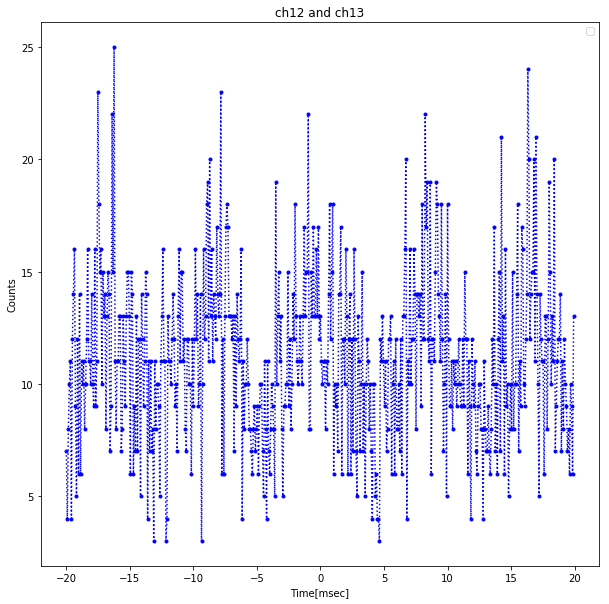

In [32]:
nbins = 500
h = np.histogram(dt_1213, bins = nbins)[0]
x = np.linspace(-20,20, nbins + 1)   # -2sec to 2sec
fig, ax = plt.subplots(figsize=(10,10))
#ax.hist(dt,bins = nbins)
#best_vals, covar = curve_fit(gauss, x[:-1], h, p0 = [20, 0, .01, 20])
ax.plot(x[:-1],h,'b.:')
#ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ms\n sigma  = %.3f +/- %.1f ms\n D= %.2f +/- %.1f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3])))
plt.xlabel('Time[msec]');plt.ylabel('Counts')
plt.title('ch12 and ch13')
plt.legend()